In [16]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import os

from matplotlib import offsetbox
from time import time
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, scale
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cross_decomposition import CCA

X = pd.read_csv(os.getcwd() + '/InitialData/Extracted_features.csv', header= None)
seeds = np.loadtxt(os.getcwd() + '/InitialData/Seed.csv', delimiter=',', dtype=int)

n_samples, n_features = X.shape

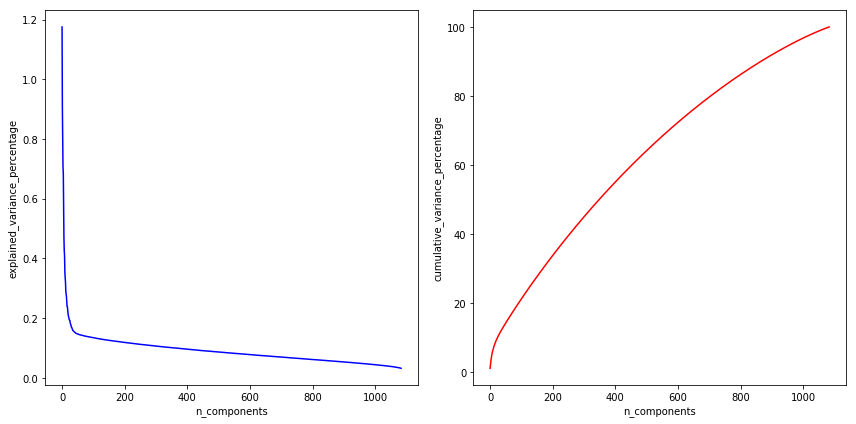

In [26]:
def plt_PCA(X) :
    X_std = StandardScaler(with_std=False).fit_transform(X)

    pca = PCA()
    # Plot the PCA spectrum
    pca.fit(X_std)

    plt.clf()
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(121)
    ax1.plot(pca.explained_variance_ratio_ * 100, 'b-')
    ax1.set_xlabel('n_components')
    ax1.set_ylabel('explained_variance_percentage')

    ax2 = fig.add_subplot(122)
    ax2.plot(pca.explained_variance_ratio_.cumsum() * 100, 'r-')
    ax2.set_xlabel('n_components')
    ax2.set_ylabel('cumulative_variance_percentage')

    plt.tight_layout()
    plt.show()

plt_PCA(X)

In [3]:
# X_std = StandardScaler().fit_transform(X)


# kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
# X_kpca = kpca.fit_transform(X)
# X_back = kpca.inverse_transform(X_kpca)

# def plt_PCA:
#     plt.clf()
#     fig = plt.figure(figsize=(12, 6))

#     ax1 = fig.add_subplot(121)
#     ax1.plot(pca.explained_variance_ratio_ * 100, 'b-')
#     ax1.set_xlabel('n_components')
#     ax1.set_ylabel('explained_variance_percentage')

#     ax2 = fig.add_subplot(122)
#     ax2.plot(pca.explained_variance_ratio_.cumsum() * 100, 'r-')
#     ax2.set_xlabel('n_components')
#     ax2.set_ylabel('cumulative_variance_percentage')

#     plt.tight_layout()
#     plt.show()

# kpca.lambdas_

In [4]:
data = pd.read_csv(os.getcwd() + '/InitialData/Graph.csv', header= None)
data = data.values

n = max(max(i, j) for i, j in data) # Get size of matrix
print(n)
matrix = [[0] * n for i in range(n)]

for i,j in data:
    matrix[i-1][j-1] = 1 # Convert to 0-based index.
    matrix[j-1][i-1] = 1

matrix = np.matrix(matrix)

6000


In [5]:
# choose n_features for graph embedding
k = 1000

spectral = SpectralEmbedding(n_components=k, eigen_solver='arpack', affinity="precomputed")
X_sp = spectral.fit_transform(matrix)

In [6]:
# Custom implementation of CCA, as scikit support for CCA is not optimal.
# Source: https://github.com/gallantlab/pyrcca 
#(Docs: https://www.frontiersin.org/articles/10.3389/fninf.2016.00049/full)
import h5py
import sys
sys.path.insert(0, os.getcwd() + '/modules')
import rcca

# Can use rcca.CCACrossValidate for hyperpararmeter search 
cca = rcca.CCA(kernelcca = False, reg = 0., numCC = 1000)
cor = cca.train([X[:6000].values, X_sp])


Training CCA, regularization = 0.0000, 1000 components


In [7]:
X_pred = X[6000:]
X_train = X[:6000]
X_ = (X_pred - X_train.mean()).values
X_comb = np.dot(X_, cor.ws[0])

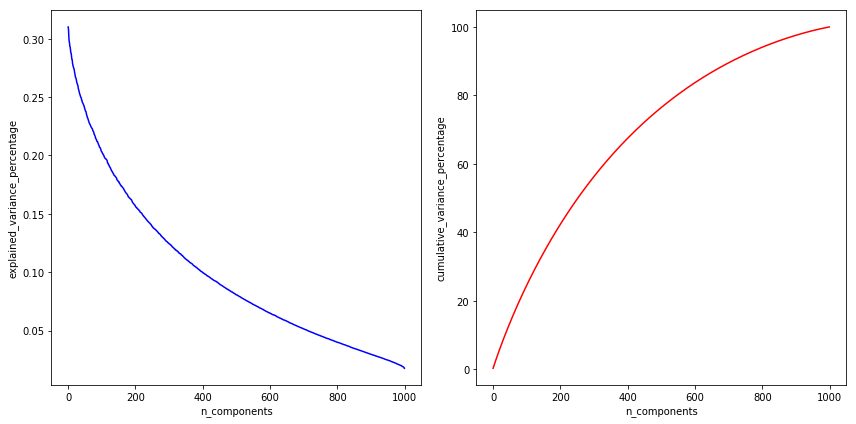

In [8]:
X_comb.shape
plt_PCA(X_comb)

In [23]:
# Scale and visualize the embedding vectors
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                  color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[y[i]], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

def plot_embedding_test(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                  color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for k in range(seeds.shape[0]):
            i = seeds[k][0]
            dist = np.sum((X[i] - shown_images) ** 2, 1)
#             if np.min(dist) < 4e-3:
#                 # don't show points that are too close
#                 continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[seeds[k][1]], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [10]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_comb)

Computing t-SNE embedding


In [11]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(X_tsne)
y = kmeans.labels_

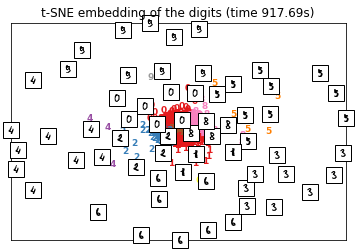

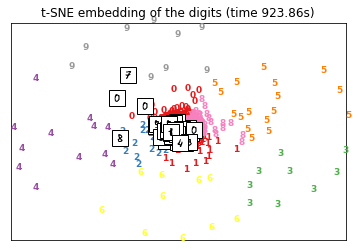

In [27]:
digits = load_digits(n_class= 10)

plot_embedding(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plot_embedding_test(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [30]:
X_comb = cor.comps[0]

In [31]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X_comb)

Computing t-SNE embedding


In [32]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(X_comb)
y = kmeans.labels_

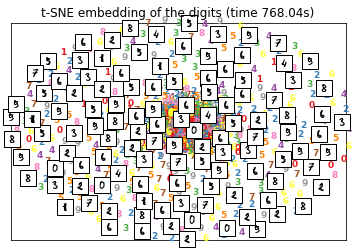

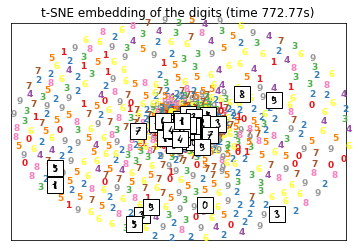

In [33]:
digits = load_digits(n_class= 10)
plot_embedding(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plot_embedding_test(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [34]:
label_pred = kmeans.labels_[seeds[0]]
print(label_pred)

[7 5]


In [35]:
# import sklearn.metrics

# metrics.completeness_score(seeds[1], label_pred)

Computing PCA projection


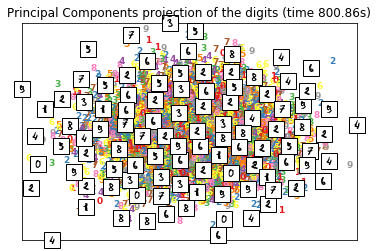

In [36]:
import sklearn.decomposition
print("Computing PCA projection")
X_pca = TruncatedSVD(n_components=2).fit_transform(X_comb)
plot_embedding(X_pca, y,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [37]:
#jaiveer

import numpy as np
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
import os

from matplotlib import offsetbox
from time import time
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, scale
from sklearn.manifold import SpectralEmbedding, TSNE
from sklearn.cross_decomposition import CCA
import os
import sys

# Very basic PCA followed by k-means

X = np.loadtxt(os.getcwd() + '/InitialData/Extracted_features.csv', delimiter=',')
seeds = np.loadtxt(os.getcwd() + '/InitialData/Seed.csv', dtype = int, delimiter=',')

X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components = 30)
Y = pca.fit_transform(X_std)

# Y = np.loadtxt(os.getcwd() + '/InitialData/X_cca.csv', delimiter=',')

# Generate seed sets for each digit
seed_set = [[]*10 for x in range(10)] # sets of ids of seeds of each digit
for t in range(60):
    id,digit = seeds[t]
    seed_set[digit].append(id)
seed_set = np.array(seed_set)

K = Y[0].shape[0]
seed_means = np.zeros((10,K))
for t in range(10):
    for k in range(K):
        for i in range(6):
            seed_means[t][k] += Y[seed_set[t][i]][k]
        seed_means[t][k] = seed_means[t][k]/6

kmeans = KMeans(init=seed_means, n_clusters=10)
kmeans.fit_transform(Y)
means = kmeans.cluster_centers_
print("kmeans done")
# print(pca.explained_variance_)

kmeans done


/usr/local/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [38]:
gmm = GMM(n_components=10, covariance_type='full')
gmm.fit(Y)
gmm_labels = gmm.predict(Y)
print(gmm_labels[:60])

[5 6 8 7 2 0 5 0 7 9 3 7 1 9 8 5 3 4 6 8 2 8 9 9 7 8 5 3 0 5 0 0 1 1 7 3 6
 8 3 0 9 8 3 5 8 9 1 5 9 6 0 5 9 4 1 1 3 9 2 2]


In [39]:

# Generating labels for a cluster, given the data set clustering was done on and the seed_set. Returns new labels
def relabel(clustering, data, id_map):
    # Fill up distance matrix
    dist_matrix = np.zeros((10,10)) # row = digit, column = cluster
    for digit in range(10):
        for cluster in range(10):
            for t in range(seed_set[digit].size):
                id = seed_set[digit][t]
                dist_matrix[digit][cluster] += np.linalg.norm(clustering.cluster_centers_[cluster] - data[id_map[id]])
    #             dist_matrix[digit][cluster] += np.linalg.norm(np.dot(means[cluster] - Y[id],pca.explained_variance_))
    # Assign labels based on minimum distance to centroid
    labels = {} # dictionary key is digit assigned, value is the cluster
    while len(labels) < 10:
        min = sys.maxsize
        for digit in range(10):
            for cluster in range(10):
                if dist_matrix[digit][cluster] < min:
                    if digit not in labels and cluster not in labels.values():
                        min = dist_matrix[digit][cluster]
                        labels[digit] = cluster
    result = np.zeros((4001, 2), dtype='int')
    for digit in range(10):
        for t in range(4000):
            if kmeans.labels_[t+6000] == labels[digit]:
                result[t+1] = [int(t+6001), int(digit)]
    return result


In [40]:
# Writing result.csv file
result = np.zeros((10000, 2), dtype='int')
# result[0] = ['Id', 'Label']
# for digit in range(10):
#     for t in range(6000):
#         if kmeans.labels_[t] == labels[digit]:
#             result[t] = [int(t+1), int(digit)]
for t in range(6000):
    result[t+1] = [int(t+1), int(kmeans.labels_[t])]

result = np.array(result)
np.savetxt("result0->5999.csv", result[:6000], delimiter=",", fmt='%d')
# np.savetxt("result6000->9999.csv", result[6000:], delimiter=",", fmt='%d')
print("All done")
    

All done


In [41]:
def dissimilarity(X,Y):
    val = 0
    for i in range(X.shape[0]):
        if X[i][1] != Y[i][1]:
            val = val + 1
    val = val/X.shape[0]*100
    print(str(val)+"% dissimilarity")

In [42]:
one = np.loadtxt('result.csv', delimiter=',')
two = np.loadtxt('result2.csv',delimiter=',')
dissimilarity(one, two)

FileNotFoundError: [Errno 2] No such file or directory: 'result.csv'

In [ ]:
# ASSUMPTION: X[i] corresponds to features of data point i + 1

# new technique - do PCA on first 60 and cluster
X_std = StandardScaler().fit_transform(X)
X_std_2 = StandardScaler(with_std=False).fit_transform(X)

seed_id_map = {} # map from id to index
for i in range(seeds.shape[0]):
    seed_id_map[seeds[i][0]] = i
index_to_id_map = {v: k for k, v in seed_id_map.items()}

Seeds_features = X[seeds[:,0]]
np.savetxt("Seeds_features", Seeds_features, delimiter=",", fmt='%d')

# mean center
Seeds_features_std = StandardScaler().fit_transform(Seeds_features)
Seeds_features_std_2 = StandardScaler(with_std=False).fit_transform(Seeds_features)

pca = PCA(n_components = 1000)
Y_60_1 = pca.fit_transform(Seeds_features_std)
Y_60_2 = pca.fit_transform(Seeds_features_std_2)
kmeans1 = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans1.fit_transform(Y_60_1)
kmeans2 = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans2.fit_transform(Y_60_2)
print(kmeans1.labels_)
print(kmeans2.labels_)

In [ ]:
def purity(cluster_labels, actual_labels):
    pureness = 0
    for i in range(cluster_labels.shape[0]):
        if cluster_labels[i] == actual_labels[i]:
            pureness += 1
    return pureness/cluster_labels.shape[0]


In [ ]:
def purity_score(clusters, classes):
    """
    Calculate the purity score for the given cluster assignments and ground truth classes
    
    :param clusters: the cluster assignments array
    :type clusters: numpy.array
    
    :param classes: the ground truth classes
    :type classes: numpy.array
    
    :returns: the purity score
    :rtype: float
    """
    
    A = np.c_[(clusters,classes)]

    n_accurate = 0.

    for j in np.unique(A[:,0]):
        z = A[A[:,0] == j, 1]
        x = np.argmax(np.bincount(z))
        n_accurate += len(z[z == x])

    return n_accurate / A.shape[0]

In [ ]:
def relabel2(old_labels):
    print("here1")
    mat = np.zeros((10,10)) # cell i,j = number of times seed of digit j occurs in cluster i
    for index in range(old_labels.shape[0]):
        cluster = old_labels[index]
        mat[cluster][seeds[index][1]] += 1
    print(mat)
    print("here")
    labels = {} # dictionary key is digit assigned, value is the cluster
    while len(labels) < 10:
        maxi = 0
        for digit in range(10):
            for cluster in range(10):
                if mat[cluster][digit] > maxi and (digit not in labels and cluster not in labels.values()):
                    maxi = mat[cluster][digit]
                    labels[digit] = cluster
        if maxi == 0:
            digit = np.random.randint(10)
            cluster = np.random.randint(10)
            if digit not in labels and cluster not in labels.values():
                labels[digit] = cluster
    new_labels = np.zeros((60,))
    for k, v in labels.items():
        for x in range(old_labels.shape[0]):
            if old_labels[x] == v:
                new_labels[x] = k
    return new_labels

In [ ]:
def relabel3(old_labels):

In [ ]:
print (purity_score(kmeans1.labels_, seeds[:,1]))
print (purity_score(kmeans2.labels_, seeds[:,1]))
label1 = relabel2(kmeans1.labels_)
label2 = relabel2(kmeans2.labels_)
print(label1)
print(label2)
print(str(purity(label1,seeds[:,1])))
print(str(purity(label2,seeds[:,1])))

print(metrics.completeness_score(seeds[:,1],label1))

In [ ]:
graph = np.loadtxt(os.getcwd() + '/InitialData/Graph.csv', delimiter=',')

In [ ]:
small_graph = matrix[:60,:60]
print(small_graph.shape)
        
spectral = SpectralEmbedding(n_components=20, eigen_solver='arpack', affinity="precomputed")
X_sp = spectral.fit_transform(small_graph)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit_transform(X_sp)
label1 = relabel2(kmeans.labels_)
print(metrics.completeness_score(seeds[:,1],label1))

In [ ]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [ ]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

In [ ]:
def plot_embedding_test(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                  color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
#         shown_images = np.array([[1., 1.]])  # just something big
        for k in range(seeds.shape[0]):
#             i = seeds[0][k]
#             shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[int(seeds[k][1])], cmap=plt.cm.gray_r),
                X[k])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(X_tsne)
y = kmeans.labels_

digits = load_digits(n_class= 10)

# plot_embedding(X_tsne, y,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

plot_embedding_test(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [ ]:
result = relabel(kmeans, X_tsne, seed_id_map)
np.savetxt("result-tsne.csv", result, delimiter=",", fmt='%d')


In [ ]:
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(X_tsne)
y = kmeans.labels_

plot_embedding_test(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [ ]:
# print("Computing Spectral embedding")
# embedder = cluster.SpectralClustering(n_components=2, random_state=0,
#                                       eigen_solver="arpack")
# t0 = time()
# X_se = embedder.fit_transform(X)

# kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
# kmeans.fit(X_tsne)
# y = kmeans.labels_

# plot_embedding_test(X_se,
#                "Spectral embedding of the digits (time %.2fs)" %
#                (time() - t0))
# plt.show()

In [ ]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(seeds.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
    
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

#     plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)
    plot_embedding_test(X_tsne, y,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))


plt.show()

In [ ]:
k = 50
print("running spectral")
spectral = SpectralEmbedding(n_components=k, eigen_solver='arpack', affinity="precomputed")
X_sp = spectral.fit_transform(matrix)
view2 = spectral.embedding_

print("running pca")
X_std = StandardScaler(with_std=False).fit_transform(X)
pca = PCA(n_components = k)
X_pca = pca.fit_transform(X_std)

print("running cca")
cca = CCA(n_components=20)
sp_cca, pca_cca = cca.fit_transform(X_sp, X_pca[:6000])

print("done")



In [ ]:
Y2 = X_std * pca_cca